# Creating Visualizations with Matplotlib and Pandas

Matplotlib is a "Python 2D plotting library" for creating a wide range of data visualizations.  Pandas bills itself as a "Python data analysis library."  Together, they provide a powerful toolkit for doing data science.

Each library is very powerful, and that means they *can* get complicated.  Here, we will stick to a few specific tools each library provides in order to limit the complexity.

***
First, some imports.

The first imports one *piece* of Matplotlib and names it `plt`.  This is commonly done to make it faster to type (we'll be using it and thus typing it a lot).  This will be our tool for creating and modifying plots.

In [1]:
import matplotlib.pyplot as plt

The second imports pandas and names the whole library `pd`, again a common short name used to make code slightly shorter and faster to type.

In [2]:
import pandas as pd

The following line is needed just to make pandas and matplotlib work together correctly when your data contain dates, which the example data in this notebook do.

In [3]:
pd.plotting.register_matplotlib_converters()

We'll also run the following line of code to make the charts look a bit nicer than the defaults in Jupyter.

In [4]:
# For slightly nicer charts
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150

***
## Loading data with Pandas

We've seen and written code for reading data from files.  It's complicated, especially when we have to parse the data (converting strings to numbers and other data types) and filter it (dealing with missing or incorrect values, for example).  Because this is a common task, though, pandas provides tools that handle many common situations.

In our case, we will be reading data from `.csv` files (storing data in the [Comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values) format), and pandas provides the `pd.read_csv()` method.  We give it a filename as an argument.  Here, we're loading data from the [Broadway dataset](https://think.cs.vt.edu/corgis/csv/broadway/) from CORGIS.

Because one of the columns contains dates, we tell pandas to parse the dates by giving the `parse_dates` argument a list containing that column's name.  Remember that all of the data in a file is just one big string.  And when pandas reads a CSV file, it reads all of the values as strings initially.  It automatically detects numbers and converts them into int or float data types, but dates are often just left as strings.  We have to tell it explicitly that we want to convert those string values into a data type that represents a date, not just a string of characters.
  
The `pd.read_csv()` method returns a **dataframe**.  We'll evaluate the dataframe variable by itself on the last line of the cell to see what it is.

In [5]:
df = pd.read_csv("broadway.csv", parse_dates=["Full"])
df

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
0,5500,88,26,1990-08-26,134456,0,8,Tru,8,Booth,Play,1990
1,1737,100,24,1991-03-24,100647,0,3,Miss Saigon,0,Broadway,Musical,1991
2,12160,100,31,1991-03-31,634424,0,3,Miss Saigon,0,Broadway,Musical,1991
3,13921,100,7,1991-04-07,713353,0,4,Miss Saigon,0,Broadway,Musical,1991
4,10973,90,14,1991-04-14,573981,0,4,Miss Saigon,4,Broadway,Musical,1991
5,14076,101,21,1991-04-21,706793,0,4,Miss Saigon,8,Broadway,Musical,1991
6,14065,101,28,1991-04-28,714968,0,4,Miss Saigon,8,Broadway,Musical,1991
7,14064,101,5,1991-05-05,730765,0,5,Miss Saigon,8,Broadway,Musical,1991
8,13896,100,12,1991-05-12,766713,0,5,Miss Saigon,8,Broadway,Musical,1991
9,13738,99,19,1991-05-19,763332,0,5,Miss Saigon,8,Broadway,Musical,1991


The dataframe (which we named `df`) is a table with 31,296 rows and 12 columns containing all of the data from the CSV file.  It has parsed out the column names, given each row an index (counting from 0), parsed strings into numbers in certain columns automatically, and given us a single **object** (the `df` variable) that we can use to access all of this.

***
## Plotting data from a dataframe

We can use a dataframe as a source of data for Matplotlib's plotting functions.  Instead of giving the plotting functions lists of values, we give it the entire dataframe (as an argument `data=[...]`) and specify which columns we want to plot by name.

For example, to make a scatter plot with the Attendance values on the x axis and Gross (revenue) values on the y axis, we can call `plt.scatter()` with `x="Attendance"`, `y="Gross"`, and `data=df`.

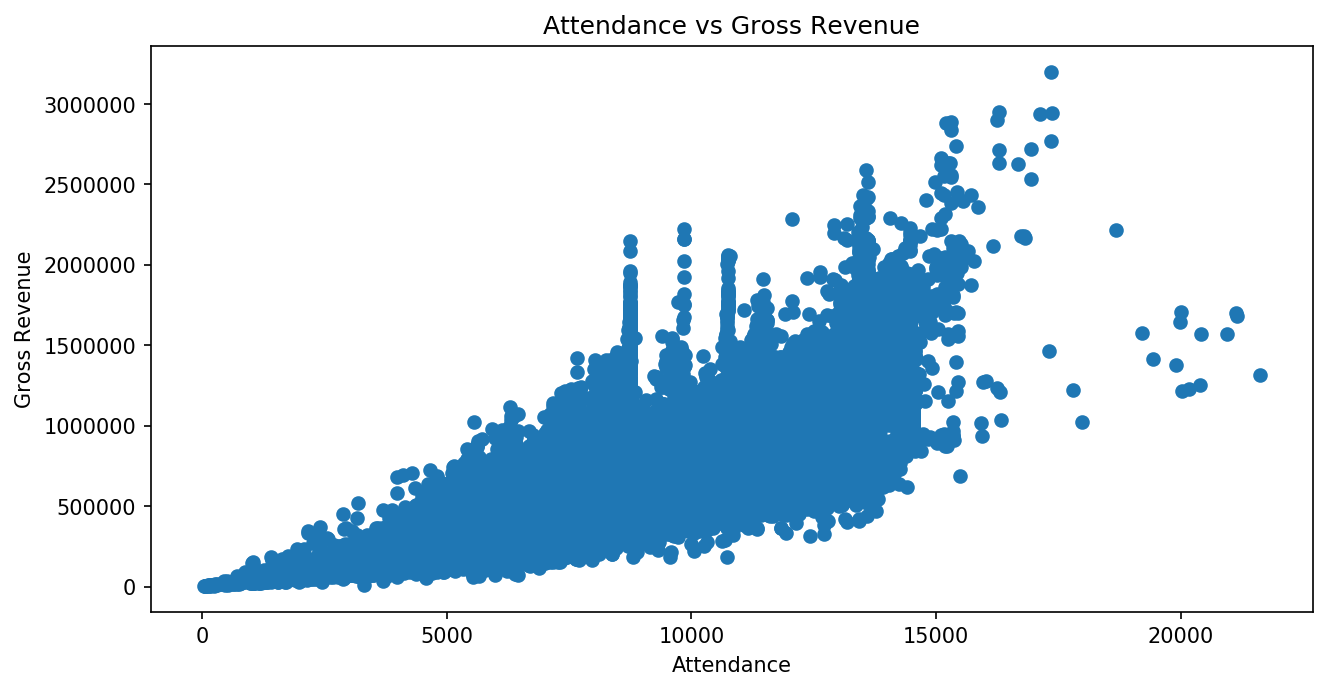

In [6]:
plt.scatter(x="Attendance", y="Gross", data=df)
plt.xlabel("Attendance")
plt.ylabel("Gross Revenue")
plt.title("Attendance vs Gross Revenue")
plt.show()

This particular plot has 31 thousand markers and a lot of overlap, which makes it difficult to see what is going on in the giant "blob" of overlapping markers.  To make a better, more useful visualization, we can set `alpha=0.1` to make the markers semi-transparent and `s=2` to reduce the size of each marker.

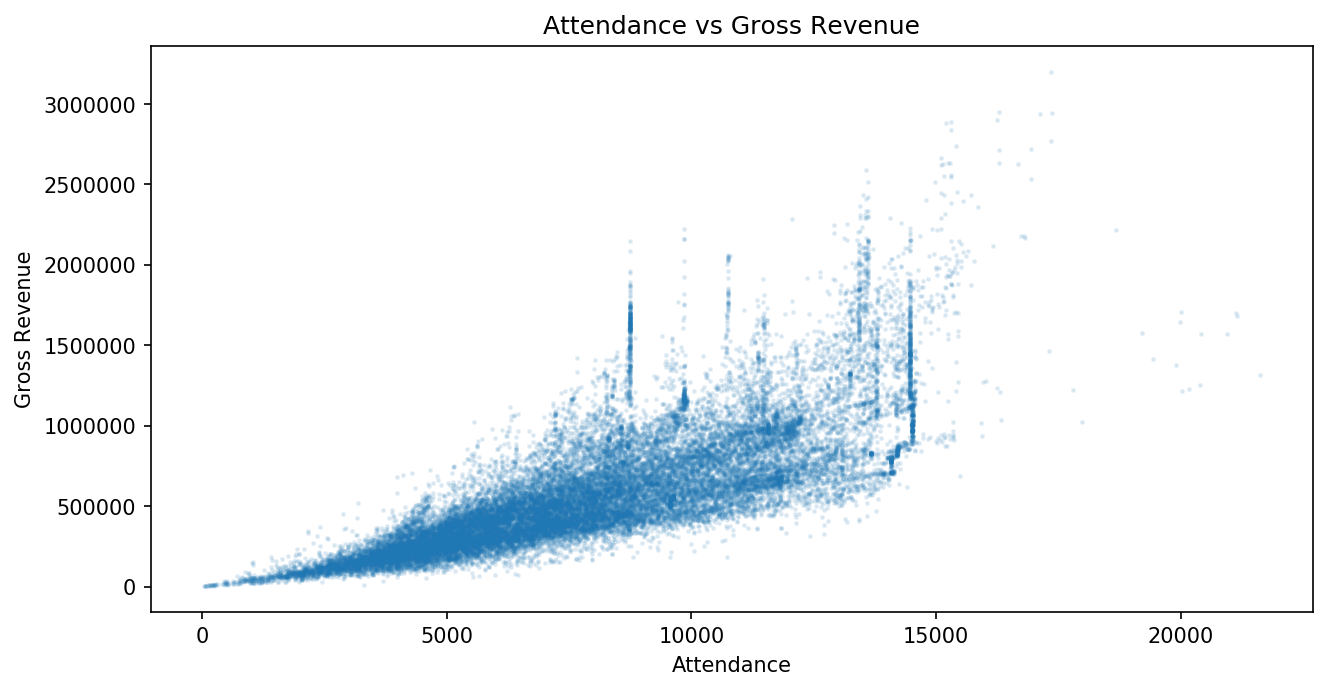

In [7]:
plt.scatter(x="Attendance", y="Gross", data=df, alpha=0.1, s=2)
plt.xlabel("Attendance")
plt.ylabel("Gross Revenue")
plt.title("Attendance vs Gross Revenue")
plt.show()

***
## Histogram

Again, we can specify the data we want to plot in a histogram by giving the `plt.hist()` method a column label for its `x` argument and a dataframe for the `data` argument.

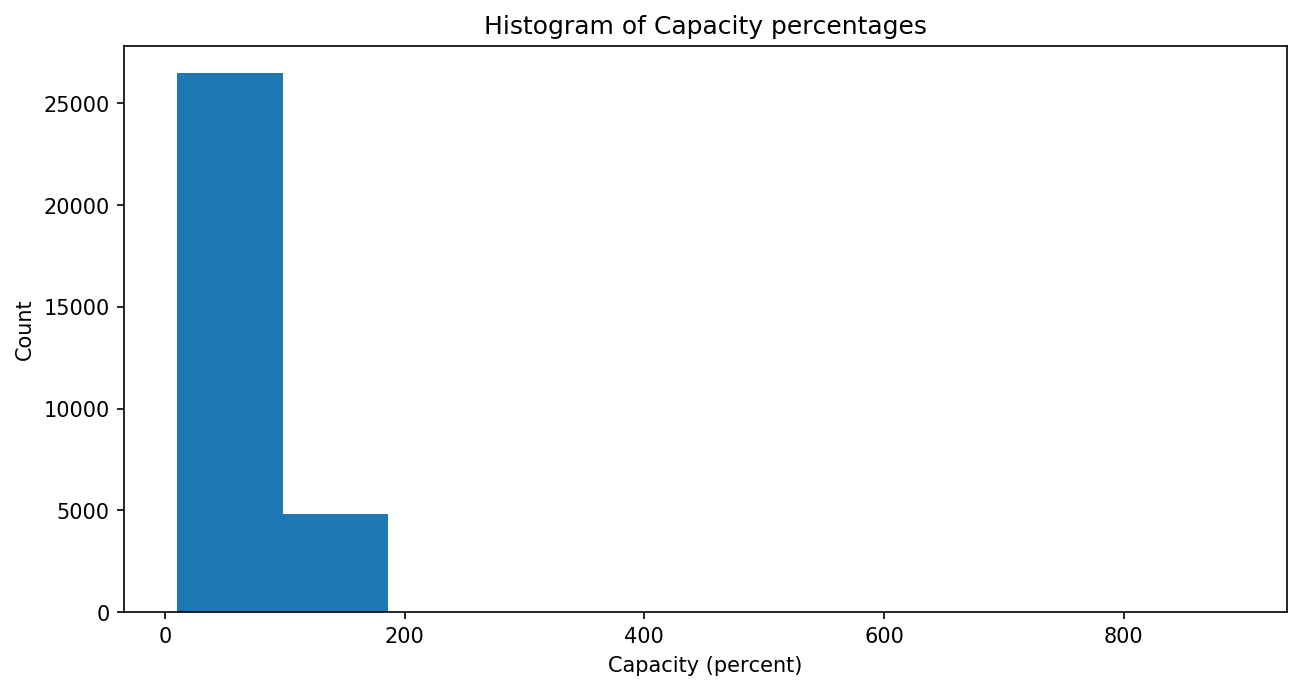

In [8]:
plt.hist(x="Capacity", data=df)
plt.xlabel("Capacity (percent)")
plt.ylabel("Count")
plt.title("Histogram of Capacity percentages")
plt.show()

This plot looks odd.  The x-axis extends to 800 and beyond, even though it should be representing a capacity percentage that shouldn't go much above 100%.  But there are a few rows in the data that contain odd capacity values well above 100%.  We might choose to visualize the "normal" capacity values alone by filtering out the odd ones.

To do this, we can use the dataframe's `.query()` method.  This method takes a string as an argument that it will interpret as a condition.  The method **returns a new dataframe** containing any rows for which that condition is True.  We store the return value in a new dataframe variable (here, `df_filtered_cap`) and use that as our data source for the `plt.hist()` method.

We've also changed the number of bins here to get a slightly more granular breakdown of the data.

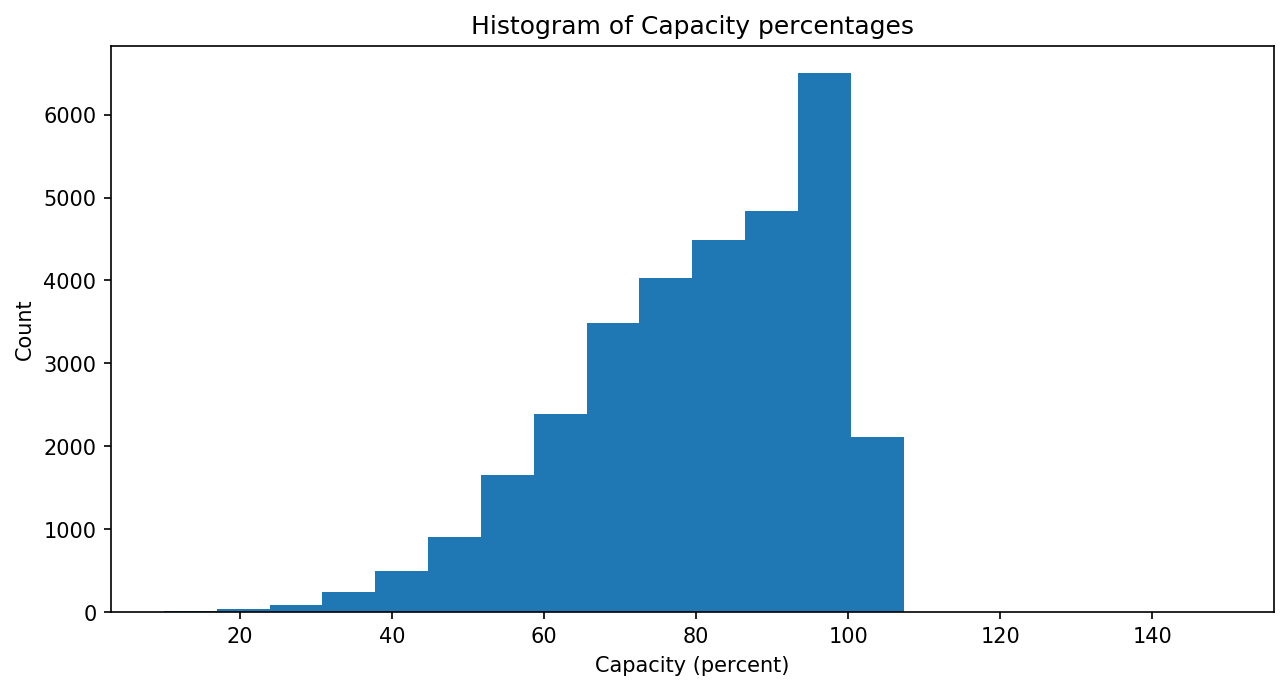

In [9]:
df_filtered_cap = df.query('Capacity < 200')
plt.hist(x="Capacity", data=df_filtered_cap, bins=20)
plt.xlabel("Capacity (percent)")
plt.ylabel("Count")
plt.title("Histogram of Capacity percentages")
plt.show()

***
## Line Chart

For line charts, again we call Matplotlib's plotting function (`plt.plot()` in this case), specifying column labels as the first two arguments (for the x and y axis) and a dataframe as a data source using the `data` argument.

[You may have noticed by now that the `plt.plot()` function is the one charting function for which we do *not* write `x=` and `y=` before the x and y arguments.  The other functions allow it, and doing so is best for writing clear code, but if you try to add those for `plt.plot()`, you will get an error.  So do use the `x=`, etc. argument labels in other chart drawing functions for clarity, but leave them out with `plt.plot()`.]

Here, we want to compare revenue over time for *Rent* and *The Lion King*, so we make two new dataframes each containing just the data for one of those shows.  Again, we can use the `.query()` dataframe method to do this.  Note how we have to specify the string value `"Rent"` or `"The Lion King"` inside the query string itself, so we use two different types of quotation marks.

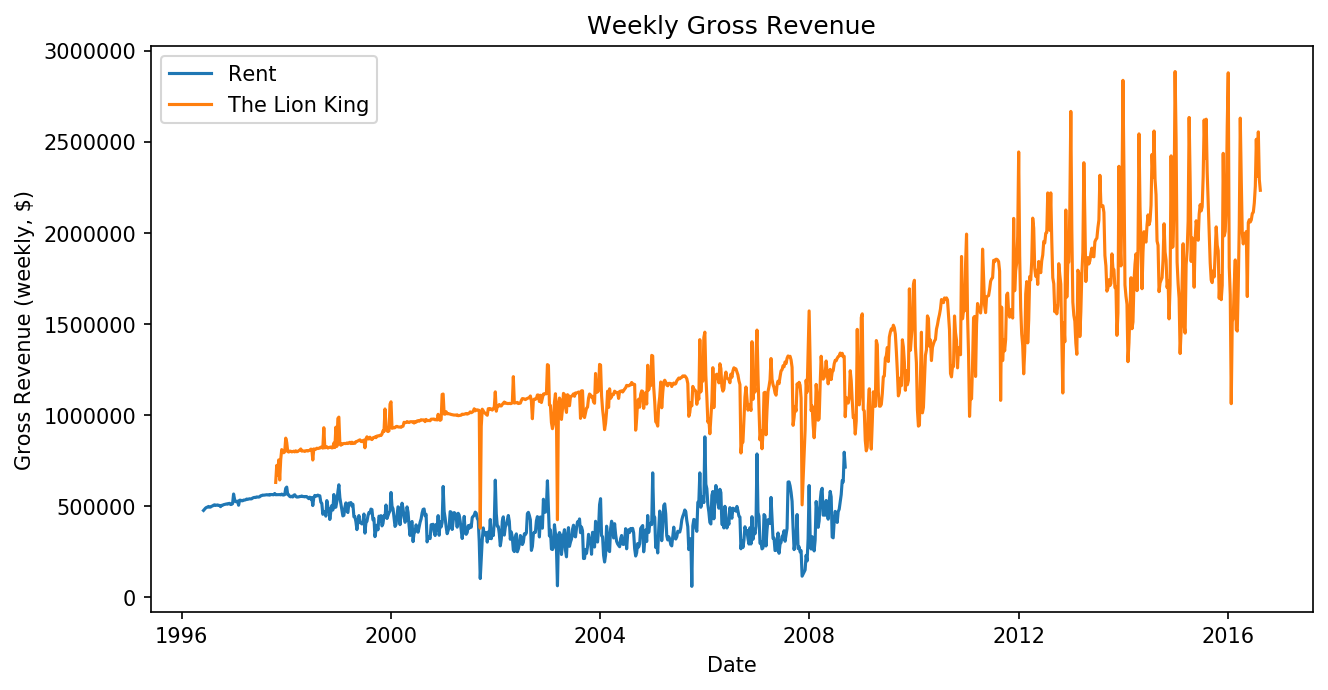

In [10]:
df_rent = df.query('Name == "Rent"')
df_lionking = df.query('Name == "The Lion King"')
plt.plot('Full', 'Gross', data=df_rent)
plt.plot('Full', 'Gross', data=df_lionking)
plt.xlabel("Date")
plt.ylabel("Gross Revenue (weekly, $)")
plt.legend(["Rent", "The Lion King"])
plt.title("Weekly Gross Revenue")
plt.show()

***
## Scatter Plot

We can use those same dataframes (with data from *Rent* and *The Lion King*) to make a scatter plot investigating their revenue further..

Here, we plot attendance vs revenue for each show in one combined plot.  We've set `alpha` and `s` arguments for each to make individual data points easier to see.

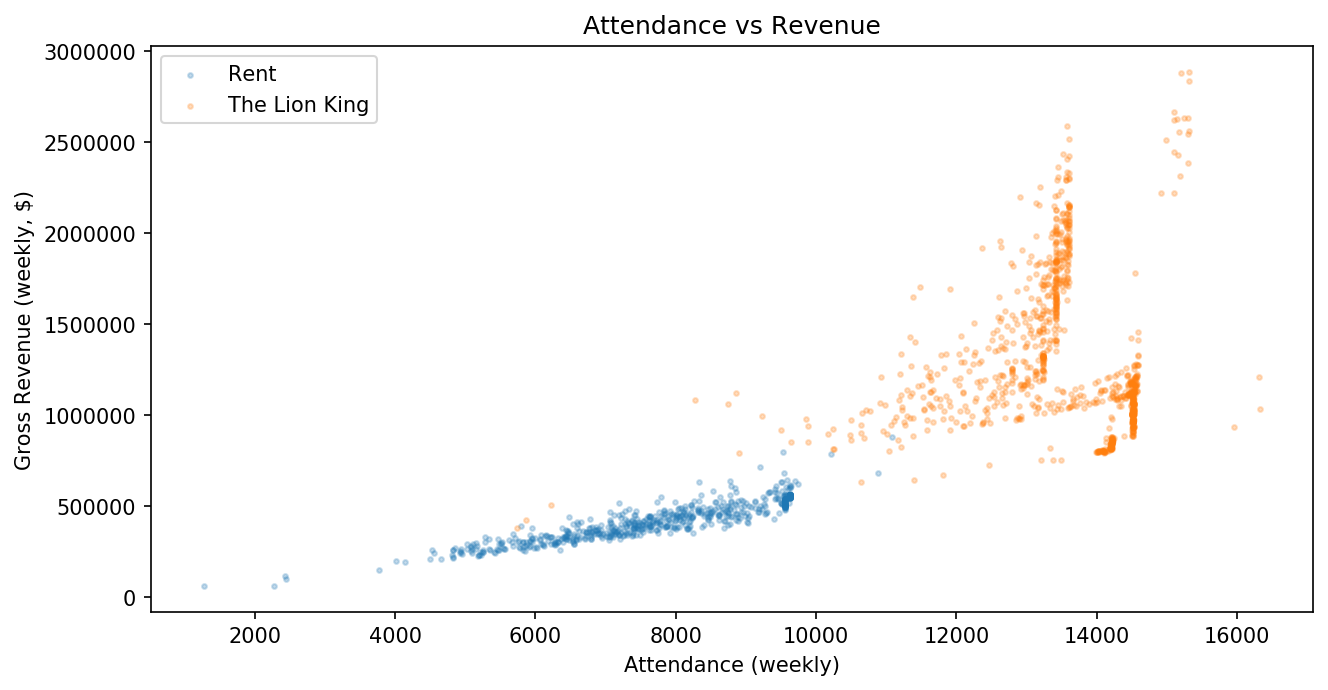

In [11]:
plt.scatter(x='Attendance', y='Gross', data=df_rent, alpha=0.25, s=5)
plt.scatter(x='Attendance', y='Gross', data=df_lionking, alpha=0.25, s=5)
plt.xlabel("Attendance (weekly)")
plt.ylabel("Gross Revenue (weekly, $)")
plt.legend(["Rent", "The Lion King"])
plt.title("Attendance vs Revenue")
plt.show()

***
## Bar Chart

Bar charts are often used for displaying just a few categories together at once.  A plot with 31 thousand bars is not very useful, for example.  Very often, then, we will **group** rows across a table by some characteristic and **aggregate** data across multiple rows for each group.

For example, we might want to see the total gross revenue for all Broadway shows, grouped by type of show.  Pandas gives us functions to do this.  We'll show you how this works in a few steps.

First, we can call `.groupby()` on a dataframe, specifying a column name as an argument.  This will group all of the rows based on unique values in that column.  The "Type" column in our data has three values ("Musical", "Play", and "Special"), and we'll end up with three groups.

In [12]:
df_groupby_type = df.groupby("Type")
type(df_groupby_type)

pandas.core.groupby.generic.DataFrameGroupBy

This gives us a `DataFrameGroupBy` object.  We still need to do the aggregation.  Sums and averages (means) are commonly used here.  We'll take a sum across each group.

In [13]:
df_groupby_type_sums = df_groupby_type.sum()
df_groupby_type_sums

,Attendance,Capacity,Day,Gross,Gross Potential,Month,Performances,Year
Type,,,,,,,,
Musical,205909883,1882287,354478,15792740093,1488758,147858,170514,45237842
Play,43056274,618454,132291,2737985361,446950,53389,53878,16858645
Special,1731171,26064,5231,123844139,17289,2460,1716,679381


We get back a new dataframe with one row per Type value.  Each column now contains the *sum* of that column's values across all of the rows that had the matching type.  For example, here we can see that there are 1716 performances in *total* across *all* "Special" shows.

We need to take one last step to make this useable for plotting a bar chart.  We need to turn the **index** (the name assigned to each row) back into a **data column**.  We use the `.reset_index()` method for that:

In [14]:
df_groupby_type_sums = df_groupby_type_sums.reset_index()
df_groupby_type_sums

,Type,Attendance,Capacity,Day,Gross,Gross Potential,Month,Performances,Year
0,Musical,205909883,1882287,354478,15792740093,1488758,147858,170514,45237842
1,Play,43056274,618454,132291,2737985361,446950,53389,53878,16858645
2,Special,1731171,26064,5231,123844139,17289,2460,1716,679381


Notice how we now have a "Type" column, and each row is just given a number index now?  This will let us use the "Type" data on one of our plot axes.

Finally, we can simplify all of the above steps into one line.  Because each of the methods we called returns a new object, we can **chain** the method calls like this:

In [15]:
df_groupby_type_sums = df.groupby("Type").sum().reset_index()
df_groupby_type_sums

,Type,Attendance,Capacity,Day,Gross,Gross Potential,Month,Performances,Year
0,Musical,205909883,1882287,354478,15792740093,1488758,147858,170514,45237842
1,Play,43056274,618454,132291,2737985361,446950,53389,53878,16858645
2,Special,1731171,26064,5231,123844139,17289,2460,1716,679381


You can either call each one separately like we did at first or chain them all together at once like this.  Either way works, but chaining is usually the preferred way to call all of these methods in order.

Now we can plot the grouped, summed data in a bar chart:

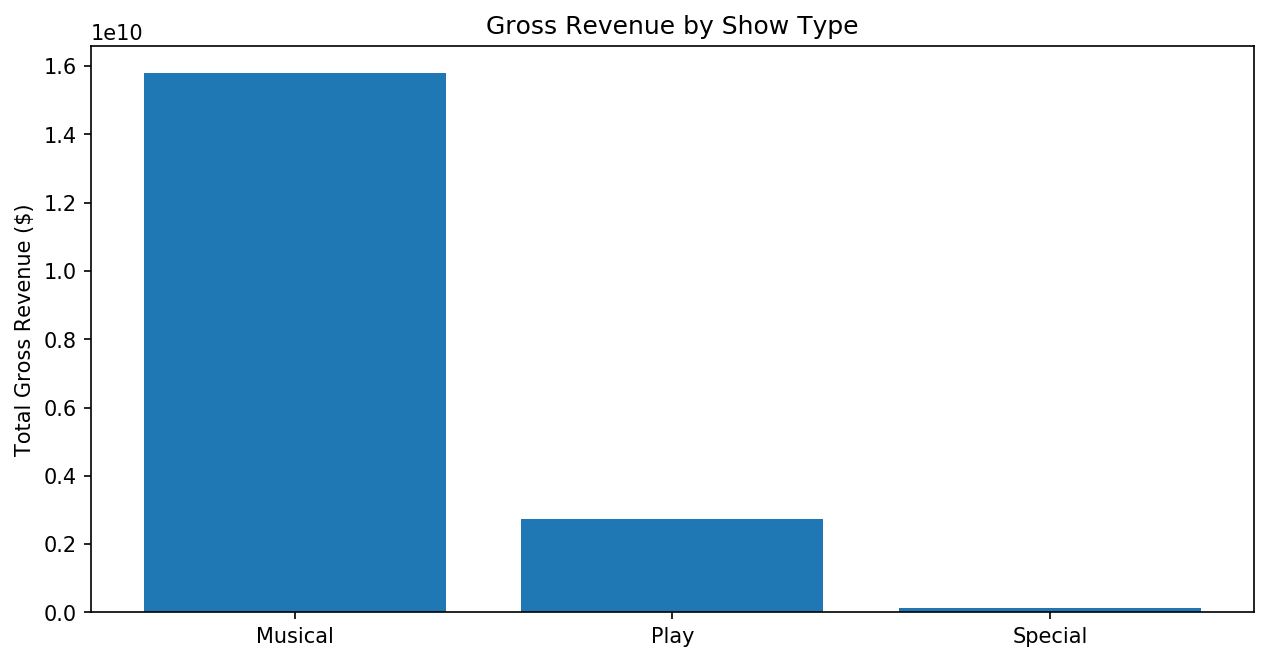

In [16]:
plt.bar(x="Type", height='Gross', data=df_groupby_type_sums)
plt.ylabel("Total Gross Revenue ($)")
plt.title("Gross Revenue by Show Type")
plt.show()